In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('ML Data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Check for null or missing values
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [5]:
x = data.drop(['Outcome'], axis = 1)

# Output data
y = data['Outcome']

In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
X = data.iloc[:, :8] #Features
Y = data.iloc[:, 8:] 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_fit = knn.fit(X_train, Y_train)
knn_pred = knn_fit.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(Y_test, knn_pred))
print("Accuracy Score:", accuracy_score(Y_test, knn_pred))


Confusion Matrix
[[87 20]
 [18 29]]
Accuracy Score: 0.7532467532467533


In [16]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, knn_pred)) #classification_report(Y_test, knn_pred)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       107
           1       0.59      0.62      0.60        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154



In [17]:
error = []
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)  
    pred = knn.predict(X_test)
    error.append(np.mean(pred != Y_test))

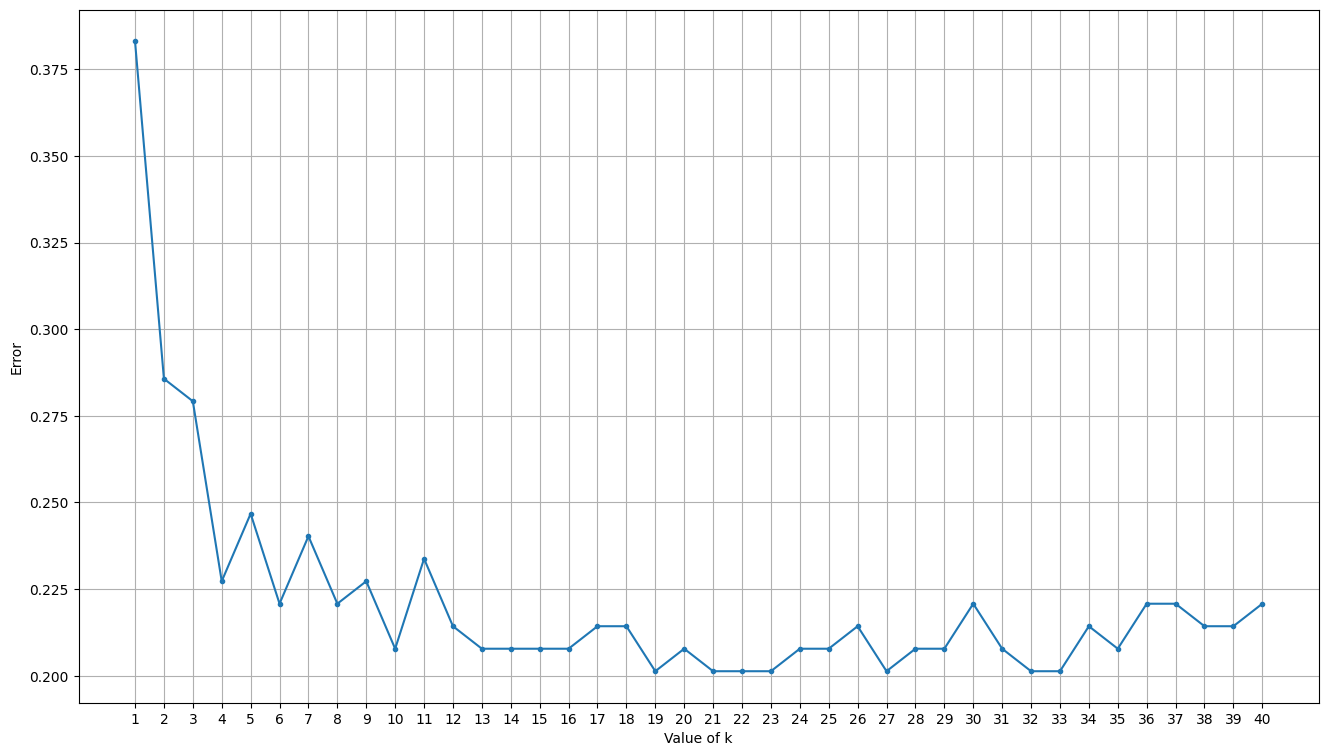

In [18]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16, 9))
plt.xlabel('Value of k')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1, 41))
plt.plot(range(1, 41), error, marker='.')

In [19]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154

